In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import trange

## Monoplex part

In [2]:
def spinson_independent_flip(opinions, spinson):
    opinions[spinson] = -1 if opinions[spinson] == 1 else 1
    
    return opinions

In [3]:
def spinson_conformity_flip(graphs, opinions, spinson, q):
    neighbours = []
    for graph in graphs:
        if len(list(graph.neighbors(spinson))) < q:
            neighbours.extend(list(graph.neighbors(spinson)))
        else:
            neighbours.extend(random.sample(list(graph.neighbors(spinson)), q))
    neighbours_opinions = [opinions[neighbour] for neighbour in neighbours]
    if len(set(neighbours_opinions)) == 1:
        opinions[spinson] = neighbours_opinions[0]

    return opinions

In [4]:
def q_voter_simulation(graphs, p, q, iterations):
    magnetization = []
        
    opinions = [1] * len(graphs[0].nodes())
    for i in range(iterations):
        for i in range(len(graphs[0])):
            spinson = random.choice(list(graphs[0].nodes()))  #  chooses one random node
            if random.random() < p:  #  does it act independtly? 
                if random.random() < 0.5:  # the same probability to change opinion
                    opinions = spinson_independent_flip(opinions, spinson)
            else:
                opinions = spinson_conformity_flip(graphs, opinions, spinson, q)

        magnetization.append(sum(opinions)/len(graphs[0]))
        
    return magnetization

In [5]:
def calculate_average_magnetization_final(graphs, ps, q, mc):
    magnetizations = []
    for j in trange(len(ps)):  
        magnetization = np.zeros(mc)
        for i in range(mc):    
            magnetization = magnetization + q_voter_simulation(graphs, ps[j], q, mc)
        magnetizations.append(magnetization[-1]/mc)
        
    return magnetizations

In [6]:
Gs = [nx.complete_graph(100)]
mc = 100
q = 4
ps = np.linspace(0, 0.35, 100)

In [7]:
monoplex_magnetization = calculate_average_magnetization_final(Gs, ps, q, mc)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [20:29<00:00, 12.29s/it]


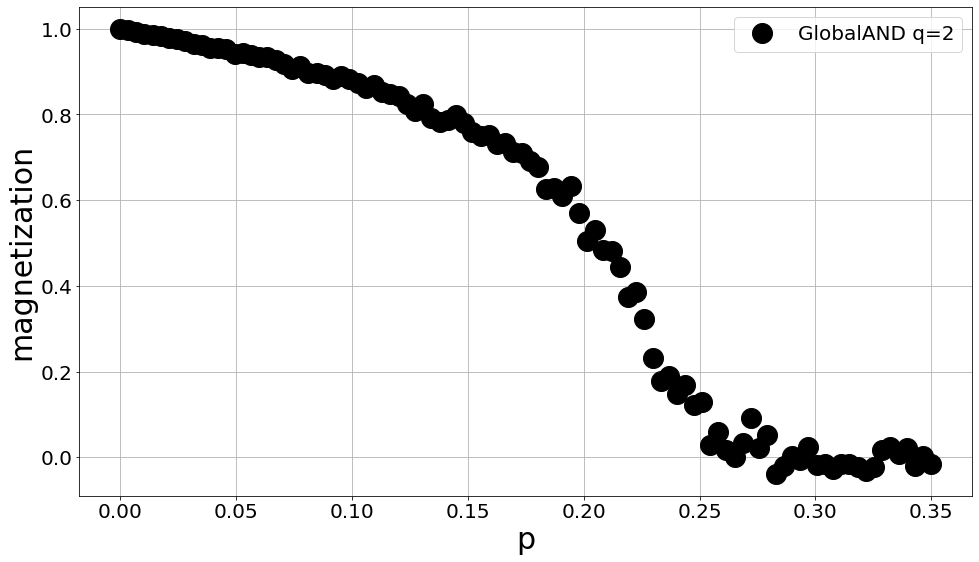

In [8]:
plt.figure(figsize=(16, 9))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(ps, monoplex_magnetization, markersize=20, marker='o', linewidth=0, color='black', label='GlobalAND q=2')
plt.xlabel('p', fontsize=30)
plt.ylabel('magnetization', fontsize=30)
plt.grid()

plt.legend(prop={'size': 20})

## Multilayer network (case: 2 layers)

In [9]:
Gs = [nx.complete_graph(100), nx.complete_graph(100)]
mc = 100
q = 2
ps = np.linspace(0, 0.35, 100)

In [10]:
two_layers_magnetization = calculate_average_magnetization_final(Gs, ps, q, mc)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [27:53<00:00, 16.73s/it]


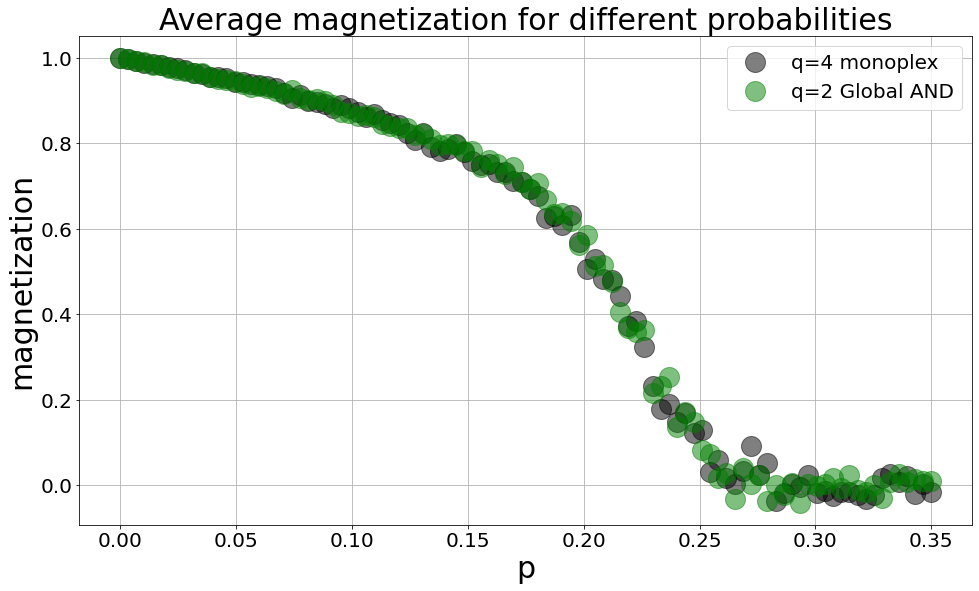

In [11]:
plt.figure(figsize=(16, 9))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(ps, monoplex_magnetization, markersize=20, marker='o', linewidth=0, color='black', label='q=4 monoplex', alpha=0.5)
plt.plot(ps, two_layers_magnetization, markersize=20, marker='o', linewidth=0, color='green', label='q=2 Global AND', alpha=0.5)
plt.xlabel('p', fontsize=30)
plt.ylabel('magnetization', fontsize=30)
plt.title('Average magnetization for different probabilities', fontsize=30)
plt.grid()

plt.legend(prop={'size': 20})